In [ ]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import open3d as o3d

# Load the STL file
pth = '/content/Yasaman Mohebi Lower jaw - 04 - Model.stl'
mesh = o3d.io.read_triangle_mesh(pth)

# Convert mesh to point cloud
point_cloud = mesh.sample_points_uniformly(number_of_points=10000000000)  # Adjust number_of_points as needed

# Save point cloud
o3d.io.write_point_cloud("Yasaman_Mohebi_Lower_jaw_04_PointCloud.ply", point_cloud)

In [ ]:
# Load the original and downsampled point clouds

original_point_cloud = o3d.io.read_point_cloud("Yasaman_Mohebi_Lower_jaw_04_PointCloud.ply")
# downsampled_point_cloud = o3d.io.read_point_cloud("Yasaman_Mohebi_Lower_jaw_04_Downsampled.ply")

# Visualize the point clouds
o3d.visualization.draw_geometries([original_point_cloud], window_name="Original Point Cloud")
# o3d.visualization.draw_geometries([downsampled_point_cloud], window_name="Downsampled Point Cloud")

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [ ]:
# Load the original and downsampled point clouds
original_point_cloud = o3d.io.read_point_cloud("Yasaman_Mohebi_Lower_jaw_04_PointCloud.ply")
# downsampled_point_cloud = o3d.io.read_point_cloud("Yasaman_Mohebi_Lower_jaw_04_Downsampled.ply")

# Visualize and save the point clouds as images
o3d.visualization.draw_geometries_with_custom_rendering(
    [original_point_cloud],
    window_name="Original Point Cloud",
    screenshot="original_point_cloud.png"
)

o3d.visualization.draw_geometries_with_custom_rendering(
    [downsampled_point_cloud],
    window_name="Downsampled Point Cloud",
    screenshot="downsampled_point_cloud.png"
)

In [ ]:
!pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.3/693.3 kB 10.3 MB/s eta 0:00:00


In [ ]:
import trimesh

pth = "/content/Yasaman Mohebi Lower jaw - 04 - Model.stl"

# Load the STL file
mesh = trimesh.load_mesh(pth)

# Convert to a point cloud
point_cloud = mesh.sample('max')  # adjust the number of points as needed

# Convert TrackedArray to PointCloud
point_cloud = trimesh.points.PointCloud(point_cloud)

# Save the point cloud to a PLY file
point_cloud.export('output_file.ply')

TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
# Load the STL file as a geometry point cloud
point_cloud = o3d.io.read_point_cloud(pth)

# Save the point cloud to a PLY file
o3d.io.write_point_cloud('output_file.ply', point_cloud)

[Open3D WARNING] Read geometry::PointCloud failed: unknown file extension for /content/Yasaman Mohebi Lower jaw - 04 - Model.stl (format: auto).
[Open3D WARNING] Write PLY failed: point cloud has 0 points.


False

In [ ]:
import trimesh
import numpy as np

def reconstruct_point_cloud_from_stl(stl_file):
    # Load the STL mesh
    mesh = trimesh.load(stl_file)

    # Optionally simplify the mesh (mesh decimation)
    # mesh = mesh.simplify()

    # Sample points on the mesh surface
    num_points = 10000  # Adjust the number of points as needed
    points, index = trimesh.sample.sample_surface(mesh, num_points)

    # Project the sampled points onto the mesh to get their 3D coordinates
    # You may want to use the index array to map back to the original triangles
    # and retrieve additional information if needed
    points_3d = trimesh.proximity.closest_point(mesh, points)[0]

    return points_3d

# Example usage
stl_file = '/content/Yasaman_Mohebi_Lower_jaw_04_PointCloud.ply'
point_cloud = reconstruct_point_cloud_from_stl(stl_file)

# Save the reconstructed point cloud to a file (e.g., PLY format)
np.savetxt('reconstructed_point_cloud.ply', point_cloud, delimiter=' ', fmt='%f')


AttributeError: 'PointCloud' object has no attribute 'area_faces'

In [ ]:
import trimesh
import numpy as np

def reconstruct_point_cloud_from_stl(stl_file):
    # Load the STL mesh
    mesh = trimesh.load(stl_file)

    # Convert mesh to a point cloud
    points = mesh.vertices

    return points

# Example usage
stl_file = '/content/Yasaman_Mohebi_Lower_jaw_04_PointCloud.ply'
point_cloud = reconstruct_point_cloud_from_stl(stl_file)

# Save the reconstructed point cloud to a file (e.g., PLY format)
np.savetxt('reconstructed_point_cloud.ply', point_cloud, delimiter=' ', fmt='%f')


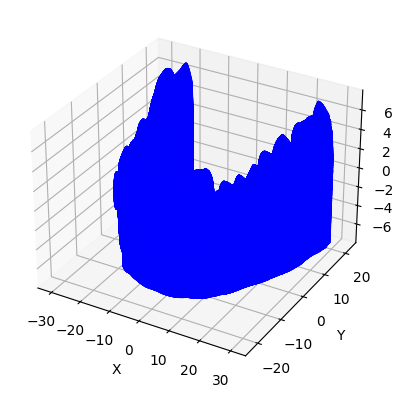

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_point_cloud(point_cloud):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract x, y, z coordinates from the point cloud
    x = point_cloud[:, 0]
    y = point_cloud[:, 1]
    z = point_cloud[:, 2]

    # Plot the point cloud
    ax.scatter(x, y, z, s=0.1, c='b')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Example usage
point_cloud_file = 'reconstructed_point_cloud.ply'
point_cloud = np.loadtxt(point_cloud_file)

visualize_point_cloud(point_cloud)


# **Extract verticles and build Pointcloud**

In [ ]:
!pip install mesh

  Preparing metadata (setup.py) ... done
  Created wheel for mesh: filename=mesh-1.0.0a1-py3-none-any.whl size=30475 sha256=7a2a02832b8a80d3be7485bafc70a552e2cb4a32d7bdda7411a5d049d0c5090c
  Stored in directory: /root/.cache/pip/wheels/d4/79/2f/b4ca9f7714539396c0db134b04aec8cb15139f37e4ca0e94b7
Successfully built mesh


In [ ]:

!pip install numpy-stl

In [ ]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import numpy as np
from stl import mesh
import open3d as o3d

# Load the STL file
pth = "/content/Yasaman Mohebi Lower jaw - 04 - Model.stl"
stl_mesh = mesh.Mesh.from_file(pth)

# Extract points from the vertices of the triangles
points = stl_mesh.vectors.reshape((-1, 3))

# Write the points to a PLY file
ptcl_pth = "/content/Yasaman Mohebi Lower jaw - 04 - Model.ply"
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
o3d.io.write_point_cloud(ptcl_pth, pcd)

True

Uniform Downsampling

In [ ]:
import numpy as np
import open3d as o3d

# Load the point cloud
pcd = o3d.io.read_point_cloud("output.ply")

# Uniform downsampling
downsampled_pcd = pcd.uniform_down_sample(every_k_points=10)

# Save the downsampled point cloud
o3d.io.write_point_cloud("uniform_downsampled_output.ply", downsampled_pcd)


True

In [ ]:
#TODO Normalize + Rotation

# **Normalize + Rotation**

In [ ]:
!pip install trimesh

In [ ]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
#Preprocessing_cutting

from sklearn.cluster import SpectralClustering
import numpy as np
import trimesh
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import open3d as o3d

import os
import glob

In [ ]:
# paths_list = os.listdir("./ply_data/Upper/")
# len(paths_list)

FileNotFoundError: [Errno 2] No such file or directory: './ply_data/Upper/'

In [ ]:
def normalize(x):
    x_normed = (x - x.min(0)) / x.ptp(0)
    return x_normed

In [ ]:
#Read Data
# i = 90
# file_name = paths_list[i]
# tooth_pcd = o3d.io.read_point_cloud("./ply_data/Upper/" + file_name)
pth = "/content/output.ply"
tooth_pcd = o3d.io.read_point_cloud(pth)
tooth_points = np.array(tooth_pcd.points)

Text(0.5, 1.0, 'Second view')

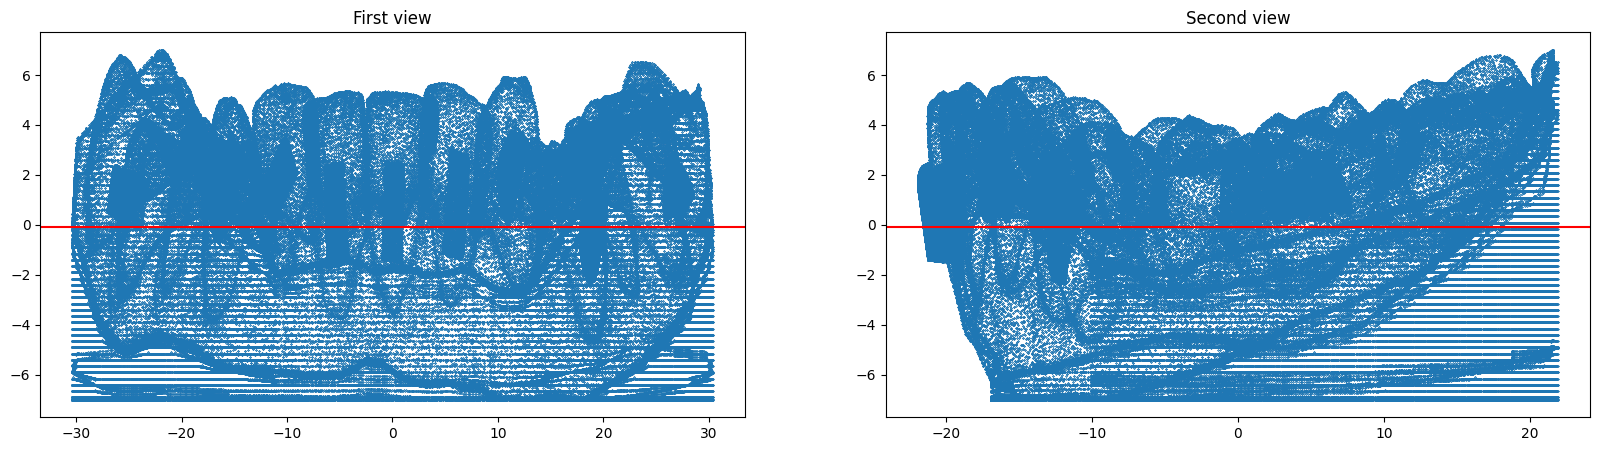

In [ ]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize=(20,5))
ax1.scatter(tooth_points[:,0], tooth_points[:,2] , s=0.05)
ax2.scatter(tooth_points[:,1], tooth_points[:,2] , s=0.05)
ax1.axhline(y=np.mean(tooth_points[:,2]), color='r', linestyle='-')
ax2.axhline(y=np.mean(tooth_points[:,2]), color='r', linestyle='-')
ax1.set_title("First view")
ax2.set_title("Second view")

In [ ]:
#Rotate if Needed
R = tooth_pcd.get_rotation_matrix_from_xyz((np.pi*0,np.pi*0.03,np.pi*0))
tooth_pcd.rotate(R, center=(0, 0, 0))
tooth_points = np.array(tooth_pcd.points)

Text(0.5, 1.0, 'Second view')

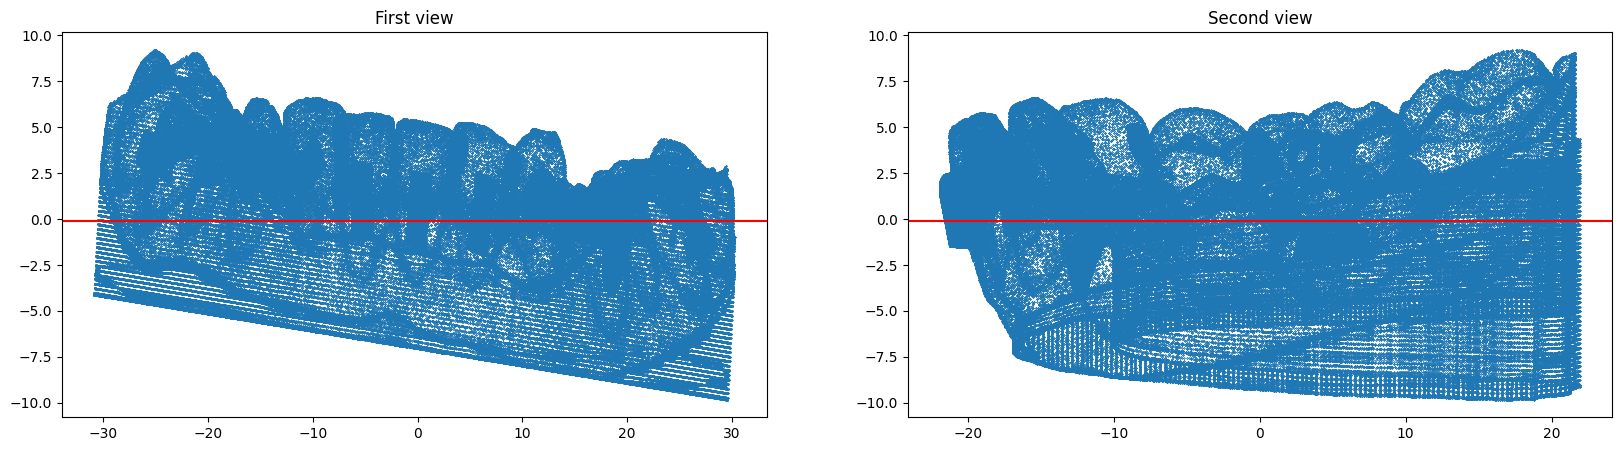

In [ ]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize=(20,5))
ax1.scatter(tooth_points[:,0], tooth_points[:,2] , s=0.05)
ax2.scatter(tooth_points[:,1], tooth_points[:,2] , s=0.05)
ax1.axhline(y=np.mean(tooth_points[:,2]), color='r', linestyle='-')
ax2.axhline(y=np.mean(tooth_points[:,2]), color='r', linestyle='-')
ax1.set_title("First view")
ax2.set_title("Second view")

In [ ]:
o3d.io.write_point_cloud("output_after_rotation.ply", tooth_pcd)

True

In [ ]:
#TODO Initial Downsample

Downsampling using Clustering - DBSCAN

In [ ]:
import open3d as o3d
from sklearn.cluster import DBSCAN
import numpy as np

# Load the point cloud

# pcd = o3d.io.read_point_cloud("/content/output.ply")
pcd = o3d.io.read_point_cloud(ptcl_pth)


# Convert Open3D point cloud to numpy array
points = np.asarray(pcd.points)

# Perform DBSCAN clustering
clusterer = DBSCAN(eps=0.1, min_samples=10)  # Adjust parameters as needed
labels = clusterer.fit_predict(points)

# Extract points for each cluster
unique_labels = np.unique(labels)
clusters = []
for label in unique_labels:
    cluster_points = points[labels == label]
    clusters.append(cluster_points)

# print("unique_labels, len(unique_labels)")
# print(unique_labels, len(unique_labels))

# Determine which cluster corresponds to teeth and which corresponds to braces
# You might need to analyze properties of each cluster to make this determination

# Downsample selectively based on your analysis
# For example:
teeth_points = clusters[0]  # Assuming teeth are the first cluster
# braces_points = clusters[1]  # Assuming braces are the second cluster
# edge_points = clusters[2] # Assuming edges are the third cluster

# teeth_points = clusters[1]  # Assuming teeth are the first cluster
# braces_points = clusters[2]  # Assuming braces are the second cluster


teeth_downsampled_pcd = o3d.geometry.PointCloud()
teeth_downsampled_pcd.points = o3d.utility.Vector3dVector(teeth_points)
teeth_downsampled_pcd = teeth_downsampled_pcd.uniform_down_sample(every_k_points=10)  # Adjust downsampling parameters

# braces_downsampled_pcd = o3d.geometry.PointCloud()
# braces_downsampled_pcd.points = o3d.utility.Vector3dVector(braces_points)
# # braces_downsampled_pcd = braces_downsampled_pcd.uniform_down_sample(every_k_points=20)  # Adjust downsampling parameters

# edge_downsampled_pcd = o3d.geometry.PointCloud()
# edge_downsampled_pcd.points = o3d.utility.Vector3dVector(edge_points)
# edge_downsampled_pcd = edge_downsampled_pcd.uniform_down_sample(every_k_points=5)  # Adjust downsampling parameters

# Combine downsampled point clouds
# final_downsampled_pcd = teeth_downsampled_pcd + braces_downsampled_pcd + edge_downsampled_pcd
# final_downsampled_pcd = braces_downsampled_pcd + edge_downsampled_pcd

# Save the final downsampled point cloud
# o3d.io.write_point_cloud("downsample_20_5.ply", final_downsampled_pcd)

In [ ]:
num_edge_points = np.asarray(edge_downsampled_pcd.points).shape[0]
num_teeth_points = np.asarray(teeth_downsampled_pcd.points).shape[0]
num_braces_points = np.asarray(braces_downsampled_pcd.points).shape[0]
num_teeth_points, num_braces_points, num_edge_points

(439221, 572, 22)

In [ ]:
def find_k(number_of_points):
  if number_of_points > 50000:
    return 200
  if number_of_points > 40000:
    return 180
  if number_of_points > 30000:
    return 170
  if number_of_points > 20000:
    return 160
  return 150

def find_k_alternative(number_of_points):
  nmb = find_k(number_of_points)
  if nmb == 150:
    return 200
  if nmb == 160:
    return 180
  if nmb == 170:
    return 170
  if nmb == 160:
    return 180
  return 200

In [ ]:
teeth_downsampled_pcd = o3d.geometry.PointCloud()
teeth_downsampled_pcd.points = o3d.utility.Vector3dVector(teeth_points)
teeth_downsampled_pcd = teeth_downsampled_pcd.uniform_down_sample(every_k_points=10)  # Adjust downsampling parameters
final_downsampled_pcd = teeth_downsampled_pcd
final_alternative = final_downsampled_pcd
idxs = []
for i in range(len(clusters)):
  points = clusters[i]

  points_downsampled_pcd = o3d.geometry.PointCloud()
  points_downsampled_pcd.points = o3d.utility.Vector3dVector(points)
  num_points = np.asarray(points_downsampled_pcd.points).shape[0]
  if num_points > 10000:
    idxs.append(i)

    # final_downsampled_pcd = teeth_downsampled_pcd + braces_downsampled_pcd + edge_downsampled_pcd
    if i == 0:
      continue
    print(f"for index {i} the number of points is: {num_points}")
    k = 300
    # k_alter = find_k_alternative(num_points)
    hold = points_downsampled_pcd
    points_downsampled_pcd = points_downsampled_pcd.uniform_down_sample(every_k_points = k)
    # points_downsampled_alter = hold.uniform_down_sample(every_k_points = k_alter)
    final_downsampled_pcd += points_downsampled_pcd
    # final_alternative += points_downsampled_alter

o3d.io.write_point_cloud("final_updated3.ply", final_downsampled_pcd)
# o3d.io.write_point_cloud("alter_final_updated.ply", final_alternative)

for index 11 the number of points is: 31981
for index 424 the number of points is: 26932
for index 543 the number of points is: 18921
for index 9495 the number of points is: 32884
for index 9732 the number of points is: 46143
for index 10732 the number of points is: 43165
for index 10786 the number of points is: 17110
for index 11003 the number of points is: 33894
for index 11079 the number of points is: 17478
for index 11205 the number of points is: 13295
for index 11228 the number of points is: 25199
for index 12212 the number of points is: 39703
for index 12243 the number of points is: 17882
for index 12431 the number of points is: 33065
for index 12434 the number of points is: 18919
for index 12656 the number of points is: 46319
for index 12925 the number of points is: 34917


True

In [ ]:
# def align_braces_with_teeth(braces_points, teeth_points):
#     # Create Open3D point cloud objects for braces and teeth
#     braces_pcd = o3d.geometry.PointCloud()
#     braces_pcd.points = o3d.utility.Vector3dVector(braces_points)

#     teeth_pcd = o3d.geometry.PointCloud()
#     teeth_pcd.points = o3d.utility.Vector3dVector(teeth_points)

#     # Perform ICP registration
#     icp_result = o3d.pipelines.registration.registration_icp(
#         braces_pcd, teeth_pcd, max_correspondence_distance=0.002)  # Set max_correspondence_distance instead of threshold

#     # Transform braces points according to the ICP result
#     aligned_braces_points = np.asarray(braces_pcd.points)
#     aligned_braces_points = np.dot(icp_result.transformation,
#                                    np.vstack((aligned_braces_points.T,
#                                               np.ones(aligned_braces_points.shape[0]))))
#     aligned_braces_points = aligned_braces_points[:3].T

#     return aligned_braces_points

# def align_braces_with_teeth(braces_points, teeth_points):
#     braces_pcd = o3d.geometry.PointCloud()
#     braces_pcd.points = o3d.utility.Vector3dVector(braces_points)

#     teeth_pcd = o3d.geometry.PointCloud()
#     teeth_pcd.points = o3d.utility.Vector3dVector(teeth_points)

#     # Perform normal alignment
#     reg = o3d.pipelines.registration.registration_icp(
#         braces_pcd, teeth_pcd, 0.0002, np.identity(4),
#         o3d.pipelines.registration.TransformationEstimationPointToPoint(),
#         o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=200)
#     )

#     # Apply transformation to braces points
#     aligned_braces_points = np.dot(braces_points, reg.transformation[:3, :3].T) + reg.transformation[:3, 3]

#     return aligned_braces_points



# from sklearn.decomposition import PCA

# def align_braces_with_teeth(braces_points, teeth_points):
#     # Downsample both clusters
#     braces_downsampled = braces_points[::10]  # Adjust downsampling rate as needed
#     teeth_downsampled = teeth_points[::10]  # Adjust downsampling rate as needed

#     # Perform initial alignment using PCA
#     braces_pca = PCA(n_components=3).fit(braces_downsampled)
#     teeth_pca = PCA(n_components=3).fit(teeth_downsampled)

#     # Rotate braces points to align with teeth principal axes
#     aligned_braces_points = np.dot(braces_points, np.linalg.inv(braces_pca.components_).T)

#     # Refine alignment using ICP
#     braces_pcd = o3d.geometry.PointCloud()
#     braces_pcd.points = o3d.utility.Vector3dVector(aligned_braces_points)

#     teeth_pcd = o3d.geometry.PointCloud()
#     teeth_pcd.points = o3d.utility.Vector3dVector(teeth_points)

#     reg = o3d.pipelines.registration.registration_icp(
#         braces_pcd, teeth_pcd, 0.02, np.identity(4),
#         o3d.pipelines.registration.TransformationEstimationPointToPoint(),
#         o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=200)
#     )

#     # Apply transformation to aligned braces points
#     aligned_braces_points = np.dot(aligned_braces_points, reg.transformation[:3, :3].T) + reg.transformation[:3, 3]

#     return aligned_braces_points


# def align_braces_with_teeth(braces_points, teeth_points):
#     # Convert numpy arrays to Open3D point clouds
#     braces_pcd = o3d.geometry.PointCloud()
#     braces_pcd.points = o3d.utility.Vector3dVector(braces_points)

#     teeth_pcd = o3d.geometry.PointCloud()
#     teeth_pcd.points = o3d.utility.Vector3dVector(teeth_points)

#     # Estimate normals for the teeth point cloud
#     teeth_pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

#     # Perform ICP registration with point-to-plane distance
#     icp_result = o3d.pipelines.registration.registration_icp(
#         braces_pcd, teeth_pcd, 0.02,
#         np.identity(4),
#         o3d.pipelines.registration.TransformationEstimationPointToPlane(),
#         o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=200)
#     )

#     # Transform braces points to align with teeth surface
#     aligned_braces_points = np.dot(braces_points, icp_result.transformation[:3, :3].T) + icp_result.transformation[:3, 3]

#     return aligned_braces_points


def align_braces_with_teeth(braces_points, teeth_points):
    # Convert numpy arrays to Open3D point clouds
    braces_pcd = o3d.geometry.PointCloud()
    braces_pcd.points = o3d.utility.Vector3dVector(braces_points)

    teeth_pcd = o3d.geometry.PointCloud()
    teeth_pcd.points = o3d.utility.Vector3dVector(teeth_points)

    # Estimate normals for the teeth point cloud
    teeth_pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

    # Create a KD tree for fast nearest neighbor search
    tree = o3d.geometry.KDTreeFlann(teeth_pcd)

    # Initialize aligned braces points
    aligned_braces_points = []

    # For each point in the braces point cloud, find the nearest point on the teeth surface
    for point in braces_points:
        [k, idx, _] = tree.search_knn_vector_3d(point, 1)
        nearest_point = teeth_points[idx[0]]
        aligned_braces_points.append(nearest_point)

    return np.asarray(aligned_braces_points)


# # Usage example
# aligned_braces_points = align_braces_with_teeth(cluster_points, teeth_points)

In [ ]:
import open3d as o3d
from sklearn.cluster import DBSCAN
import numpy as np

# Load the point cloud
# ptcl_pth = "/content/output.ply"
# pcd = o3d.io.read_point_cloud(ptcl_pth)

# # Convert Open3D point cloud to numpy array
# points = np.asarray(pcd.points)

# # Perform DBSCAN clustering
# clusterer = DBSCAN(eps=0.1, min_samples=10)  # Adjust parameters as needed
# labels = clusterer.fit_predict(points)

# # Extract points for each cluster
# unique_labels = np.unique(labels)
# clusters = []
# for label in unique_labels:
#     cluster_points = points[labels == label]
#     clusters.append(cluster_points)

# # Determine which cluster corresponds to teeth and which corresponds to braces
# # You might need to analyze properties of each cluster to make this determination

# # Downsample selectively based on your analysis
# # For example:
# teeth_points = clusters[0]  # Assuming teeth are the first cluster

# Initialize the final point cloud with teeth points
teeth_downsampled_pcd = o3d.geometry.PointCloud()
teeth_downsampled_pcd.points = o3d.utility.Vector3dVector(teeth_points)
teeth_downsampled_pcd = teeth_downsampled_pcd.uniform_down_sample(every_k_points=10)  # Adjust downsampling parameters
final_downsampled_pcd = teeth_downsampled_pcd
final_alternative = final_downsampled_pcd

# Iterate over clusters representing braces and integrate them with the teeth clusters
for i in range(1, len(clusters)):

    cluster_points = clusters[i]
    if len(cluster_points) > 10000:

    # Align braces clusters with the surface of the teeth
    # You can implement surface alignment using appropriate algorithms, such as ICP or normal alignment
    # Here, I will assume you have an align_braces_with_teeth function that performs alignment

    # Align braces clusters with the teeth surface
      aligned_braces_points = align_braces_with_teeth(cluster_points, teeth_points)
      print(len(aligned_braces_points))
      pth_all = f"allinged_{i}.ply"

    # Downsample aligned braces points
      braces_downsampled_pcd = o3d.geometry.PointCloud()
      braces_downsampled_pcd.points = o3d.utility.Vector3dVector(aligned_braces_points)
      o3d.io.write_point_cloud(pth_all, braces_downsampled_pcd)
      k = 150  # Adjust downsampling parameters
      braces_downsampled_pcd = braces_downsampled_pcd.uniform_down_sample(every_k_points=k)

    # Integrate downsampled braces points with the teeth points
      final_downsampled_pcd += braces_downsampled_pcd

# Save the final downsampled point cloud
o3d.io.write_point_cloud("final_updated11.ply", final_downsampled_pcd)


31981
26932
18921
32884
46143
43165
17110
33894
17478
13295
25199
39703
17882
33065
18919
46319
34917


True

In [ ]:
o3d.io.write_point_cloud("for_completion.ply", teeth_downsampled_pcd)

True

In [ ]:
num = np.asarray(teeth_downsampled_pcd.points).shape[0]
print(f"Number of points for completion: {num}")

Number of points for completion: 45591


In [ ]:
num_points = np.asarray(final_downsampled_pcd.points).shape[0]

# num_alter = np.asarray(final_alternative.points).shape[0]
print("Number of points in the resulting point cloud:", num_points)

Number of points in the resulting point cloud: 45591


In [ ]:
def extract_indices(txt):
  idx = []
  lines = txt.split("\n")
  for line in lines:
    txtsplit = line.split(" ")
    idx.append(txtsplit[2])
  return idx

In [ ]:
idxs
# cluster 11 : gums
# cluster 543: gums
# cluster 9495: brace
# cluster 9732: brace
# cluster 10732: brace
# cluster 10786: brace
# cluster 11003: brace
# cluster 11079: brace
# cluster 11205: brace
# cluster 11228: brace
# cluster 12212: brace
# cluster 12243: brace
# cluster 12431: brace
# cluster 12434: brace
# cluster 12656: brace
# cluster 12925: brace

[0,
 11,
 424,
 543,
 9495,
 9732,
 10732,
 10786,
 11003,
 11079,
 11205,
 11228,
 12212,
 12243,
 12431,
 12434,
 12656,
 12925]

In [ ]:
import open3d as o3d
from sklearn.cluster import DBSCAN
import numpy as np

# Load the point cloud

# pcd = o3d.io.read_point_cloud("/content/output.ply")
pcd = tooth_pcd


# Convert Open3D point cloud to numpy array
points = np.asarray(pcd.points)

# Perform DBSCAN clustering
clusterer = DBSCAN(eps=0.1, min_samples=10)  # Adjust parameters as needed
labels = clusterer.fit_predict(points)

# Extract points for each cluster
unique_labels = np.unique(labels)
clusters = []
for label in unique_labels:
    cluster_points = points[labels == label]
    clusters.append(cluster_points)

# print("unique_labels, len(unique_labels)")
# print(unique_labels, len(unique_labels))

# Determine which cluster corresponds to teeth and which corresponds to braces
# You might need to analyze properties of each cluster to make this determination

# Downsample selectively based on your analysis
# For example:
teeth_points = clusters[0]  # Assuming teeth are the first cluster
braces_points = clusters[5]  # Assuming braces are the second cluster
# edge_points = clusters[2] # Assuming edges are the third cluster

# teeth_points = clusters[1]  # Assuming teeth are the first cluster
# braces_points = clusters[2]  # Assuming braces are the second cluster


teeth_downsampled_pcd = o3d.geometry.PointCloud()
teeth_downsampled_pcd.points = o3d.utility.Vector3dVector(teeth_points)
teeth_downsampled_pcd = teeth_downsampled_pcd.uniform_down_sample(every_k_points=10)  # Adjust downsampling parameters

braces_downsampled_pcd = o3d.geometry.PointCloud()
braces_downsampled_pcd.points = o3d.utility.Vector3dVector(braces_points)
braces_downsampled_pcd = braces_downsampled_pcd.uniform_down_sample(every_k_points=20)  # Adjust downsampling parameters

# edge_downsampled_pcd = o3d.geometry.PointCloud()
# edge_downsampled_pcd.points = o3d.utility.Vector3dVector(edge_points)
# edge_downsampled_pcd = edge_downsampled_pcd.uniform_down_sample(every_k_points=5)  # Adjust downsampling parameters

# Combine downsampled point clouds
# final_downsampled_pcd = teeth_downsampled_pcd + braces_downsampled_pcd + edge_downsampled_pcd
final_downsampled_pcd = teeth_downsampled_pcd + braces_downsampled_pcd

# Save the final downsampled point cloud
o3d.io.write_point_cloud("downsample_10_index(5)20.ply", final_downsampled_pcd)

True

In [ ]:
to_check = [0, 1, 5, 6, 8, 9]
for cl in idxs:
  clust = clusters[cl]
  clust_downsampled_pcd = o3d.geometry.PointCloud()
  clust_downsampled_pcd.points = o3d.utility.Vector3dVector(clust)
  # clust_downsampled_pcd = clust_downsampled_pcd.uniform_down_sample(every_k_points=10)  # Adjust downsampling parameters

  o3d.io.write_point_cloud(f"cluster{cl}.ply", clust_downsampled_pcd)

In [ ]:
num_points = np.asarray(final_downsampled_pcd.points).shape[0]
print("Number of points in the resulting point cloud:", num_points)

Number of points in the resulting point cloud: 44361


Now use epochs to show progress

In [ ]:
import open3d as o3d
from sklearn.cluster import DBSCAN
import numpy as np
from tqdm import tqdm

# Load the point cloud
try:
    pcd = o3d.io.read_point_cloud("/content/output.ply")
except Exception as e:
    print("Error loading the point cloud file:", e)

# Convert Open3D point cloud to numpy array
points = np.asarray(pcd.points)

# Check if points exist
if len(points) == 0:
    print("No points found in the point cloud. Please check the file or the loading process.")
    exit()

# Perform DBSCAN clustering
clusterer = DBSCAN(eps=0.1, min_samples=10)  # Adjust parameters as needed
labels = clusterer.fit_predict(points)

# Extract points for each cluster
unique_labels = np.unique(labels)
clusters = []
for label in unique_labels:
    cluster_points = points[labels == label]
    clusters.append(cluster_points)

# Determine which cluster corresponds to teeth and which corresponds to braces
# You might need to analyze properties of each cluster to make this determination

# Downsample selectively based on your analysis
# For example:
downsampled_clusters = []
for cluster in tqdm(clusters, desc="Downsampling clusters"):
    cluster_pcd = o3d.geometry.PointCloud()
    cluster_pcd.points = o3d.utility.Vector3dVector(cluster)
    downsampled_cluster = cluster_pcd.uniform_down_sample(every_k_points=10)  # Adjust downsampling parameters
    downsampled_clusters.append(downsampled_cluster)

# Combine downsampled point clouds
final_downsampled_pcd = sum(downsampled_clusters)

# Save the final downsampled point cloud
o3d.io.write_point_cloud("final_downsampled2.ply", final_downsampled_pcd)


Downsampling clusters: 100%|██████████| 13190/13190 [00:00<00:00, 75307.33it/s]


TypeError: unsupported operand type(s) for +: 'int' and 'open3d.cpu.pybind.geometry.PointCloud'

In [ ]:
import open3d as o3d
from sklearn.cluster import DBSCAN
import numpy as np
from tqdm import tqdm

# Load the point cloud
try:
    pcd = o3d.io.read_point_cloud("combined_point_cloud.ply")
except Exception as e:
    print("Error loading the point cloud file:", e)

# Convert Open3D point cloud to numpy array
points = np.asarray(pcd.points)

# Check if points exist
if len(points) == 0:
    print("No points found in the point cloud. Please check the file or the loading process.")
    exit()


#point [-4.947060 -17.763567 -4.709444] [731,442]

# Preprocessing: Remove noise or outliers
# Example: Remove points with z-coordinate less than a certain threshold
cleaned_points = points[points[:, 2] > 0.1]  # Adjust threshold as needed
cleaned_points = cleaned_points[cleaned_points[:, 2] < -4.725]  # Adjust threshold as needed

# Perform DBSCAN clustering with tuned parameters
clusterer = DBSCAN(eps=0.05, min_samples=50)  # Adjust parameters as needed
labels = clusterer.fit_predict(cleaned_points)

# Extract points for each cluster
unique_labels = np.unique(labels)
clusters = []
for label in unique_labels:
    cluster_points = cleaned_points[labels == label]
    clusters.append(cluster_points)

# Downsample selectively based on your analysis
# For example:
downsampled_clusters = []
for cluster in tqdm(clusters, desc="Downsampling clusters"):
    cluster_pcd = o3d.geometry.PointCloud()
    cluster_pcd.points = o3d.utility.Vector3dVector(cluster)
    downsampled_cluster = cluster_pcd.uniform_down_sample(every_k_points=10)  # Adjust downsampling parameters
    downsampled_clusters.append(downsampled_cluster)

# Combine downsampled point clouds
final_downsampled_pcd = sum(downsampled_clusters)

# Save the final downsampled point cloud
o3d.io.write_point_cloud("final_downsampled.ply", final_downsampled_pcd)

In [ ]:
import open3d as o3d
from sklearn.cluster import DBSCAN
import numpy as np

# Load the point cloud
try:
    pcd = o3d.io.read_point_cloud("/content/output.ply")
except Exception as e:
    print("Error loading the point cloud file:", e)

# Convert Open3D point cloud to numpy array
points = np.asarray(pcd.points)

# Check if points exist
if len(points) == 0:
    print("No points found in the point cloud. Please check the file or the loading process.")
    exit()

#point [-4.947060 -17.763567 -4.709444] [731,442]

# Preprocessing: Remove noise or outliers
# Example: Remove points with z-coordinate less than a certain threshold
# cleaned_points = points[points[:, 2] > 0.1]  # Adjust threshold as needed
cleaned_points = points[points[:, 2] > -4.725]  # Adjust threshold as needed

# Perform DBSCAN clustering with tuned parameters
clusterer = DBSCAN(eps=0.05, min_samples=50)  # Adjust parameters as needed
labels = clusterer.fit_predict(cleaned_points)

# Extract points for each cluster
unique_labels = np.unique(labels)
clusters = []
for label in unique_labels:
    cluster_points = cleaned_points[labels == label]
    clusters.append(cluster_points)

# Downsample selectively based on your analysis
# For example:
downsampled_clusters = []
for cluster in clusters:
    cluster_pcd = o3d.geometry.PointCloud()
    cluster_pcd.points = o3d.utility.Vector3dVector(cluster)
    downsampled_cluster = cluster_pcd.uniform_down_sample(every_k_points=10)  # Adjust downsampling parameters
    downsampled_clusters.append(downsampled_cluster)

# Combine downsampled point clouds
final_downsampled_pcd = downsampled_clusters[0]  # Start with the first downsampled cluster
for cluster_pcd in downsampled_clusters[1:]:
    final_downsampled_pcd += cluster_pcd

# Save the final downsampled point cloud
o3d.io.write_point_cloud("final_downsampled_updated.ply", final_downsampled_pcd)


True

In [ ]:
import open3d as o3d
from sklearn.cluster import DBSCAN
import numpy as np

# Define a function to check if a cluster meets the criteria for representing teeth
def cluster_meets_teeth_criteria(cluster_points):
    # Calculate the centroid of the cluster
    centroid = np.mean(cluster_points, axis=0)

    # Check if the cluster centroid is within a certain region of interest (ROI)
    # This could be based on the position of the teeth in the mouth or other criteria
    roi_center = [0, 0, 0]  # Example: Center of the mouth
    roi_radius = 10  # Example: Radius of the mouth region of interest
    if np.linalg.norm(centroid - roi_center) < roi_radius:
        return True
    else:
        return False

# Load the point cloud
try:
    pcd = o3d.io.read_point_cloud("/content/output.ply")
except Exception as e:
    print("Error loading the point cloud file:", e)

# Convert Open3D point cloud to numpy array
points = np.asarray(pcd.points)

# Check if points exist
if len(points) == 0:
    print("No points found in the point cloud. Please check the file or the loading process.")
    exit()

# Preprocessing: Remove noise or outliers
# Example: Remove points with z-coordinate less than a certain threshold
cleaned_points = points[points[:, 2] > -4.725]  # Adjust threshold as needed

# Perform DBSCAN clustering with adjusted parameters
clusterer = DBSCAN(eps=0.1, min_samples=20)  # Adjust parameters as needed
labels = clusterer.fit_predict(cleaned_points)

# Extract points for each cluster
unique_labels = np.unique(labels)
teeth_cluster = None
for label in unique_labels:
    cluster_points = cleaned_points[labels == label]
    # Apply additional post-processing to refine the clustering results
    # For example, you could analyze the cluster properties and manually adjust cluster assignments
    # or apply filtering based on cluster properties
    if cluster_meets_teeth_criteria(cluster_points):
        teeth_cluster = cluster_points
        break

# Downsample selectively based on your analysis
# For example:
if teeth_cluster is not None:
    teeth_downsampled_pcd = o3d.geometry.PointCloud()
    teeth_downsampled_pcd.points = o3d.utility.Vector3dVector(teeth_cluster)
    teeth_downsampled_pcd = teeth_downsampled_pcd.uniform_down_sample(every_k_points=10)  # Adjust downsampling parameters

    # Save the final downsampled point cloud
    o3d.io.write_point_cloud("final_downsampled_updated3.ply", teeth_downsampled_pcd)
else:
    print("No cluster representing teeth found.")


In [ ]:
num_points = np.asarray(teeth_downsampled_pcd.points).shape[0]
print("Number of points in the resulting point cloud:", num_points)

Number of points in the resulting point cloud: 36602


In [ ]:
#TODO Fix number of points